In [24]:
from helper import *

In [25]:
# Constants
zip_path = '../instacart-market-basket-analysis'
data_path = '../data/extracted_dataset'
store_path = '../data/train_test_data'
train_matrix_path = '../data/matrixes'
train_matrix_name = 'user_product_train.npz'
train_tfidf_matrix_name = 'user_product_tfidf_train.npz'

# Data preparation
extract_csv_data(zip_path, data_path)
df_product_frequency, df_user_product_frequency, df_productsPerUser_train = get_training_data(data_path, store_path)
df_productsPerUser_test = get_testing_data(data_path, store_path)
df_aisles, df_departments, df_products = get_category_data(data_path)

# Generate sparse matrix for training
user_product_matrix_train = build_user_product_matrix(df_user_product_frequency, train_matrix_path, train_matrix_name)

# Generate tf-idf matrix based on user-product-pair matrix
user_product_tfidf_matrix_train = build_tfidf_matrix(user_product_matrix_train, train_matrix_path, train_tfidf_matrix_name)

[Recommender Message] - Files in ../instacart-market-basket-analysis:
['../instacart-market-basket-analysis/order_products__prior.csv.zip', '../instacart-market-basket-analysis/order_products__train.csv.zip', '../instacart-market-basket-analysis/aisles.csv.zip', '../instacart-market-basket-analysis/orders.csv.zip', '../instacart-market-basket-analysis/departments.csv.zip', '../instacart-market-basket-analysis/products.csv.zip', '../instacart-market-basket-analysis/sample_submission.csv.zip']
[Recommender Warning] - Extracted data (../data/extracted_dataset) are already existed.
[Recommender Warning] - Training data are already existed.
[Recommender Warning] - Testing data are already existed.
[Recommender Message] - Category data are retrieved.
[Recommender Warning] - User-product matrix is already existed.
[Recommender Warning] - User-product TF-IDF matrix is already existed.


In [26]:
similar_user_num = 20 
recommend_prod_num = 10 
user_id = 1

# Use tfidf matrix for similarity calculation
recommended_prods = generate_recommendation(user_id, \
                                            user_product_matrix_train, \
                                            df_productsPerUser_train, \
                                            df_product_frequency, \
                                            similar_user_num, \
                                            recommend_prod_num)

df_aisles, df_departments, df_products = get_category_data(data_path)
df_report_recommend = report_userBased(recommended_prods, df_products, df_departments, df_aisles)
display(df_report_recommend)

# Use tfidf matrix for similarity calculation
recommended_prods_tfidf = generate_recommendation(user_id, \
                                            user_product_tfidf_matrix_train, \
                                            df_productsPerUser_train, \
                                            df_product_frequency, \
                                            similar_user_num, \
                                            recommend_prod_num)
df_report_recommend_tfidf = report_userBased(recommended_prods_tfidf, df_products, df_departments, df_aisles)

[Recommender Message] - Category data are retrieved.


,product_id,popularity,product_name,aisle_id,department_id,department,aisle
0,196,"(19, 4)",Soda,77,7,beverages,soft drinks
2,12427,"(17, 18)",Original Beef Jerky,23,19,snacks,popcorn jerky
8,13176,"(12, 246)",Bag of Organic Bananas,24,4,produce,fresh fruits
1,46149,"(10, 2572)",Zero Calorie Cola,77,7,beverages,soft drinks
9,6184,"(9, 156)",Clementines,32,4,produce,packaged produce
4,41400,"(7, 30)",Crunchy Oats 'n Honey Granola Bars,3,19,snacks,energy granola bars
5,37710,"(7, 30)",Trail Mix,125,19,snacks,trail mix snack mix
6,10258,"(7, 30)",Pistachios,117,19,snacks,nuts seeds dried fruit
7,31651,"(6, 8)",Extra Fancy Unsalted Mixed Nuts,117,19,snacks,nuts seeds dried fruit
3,46061,"(5, 15)",Popcorn,23,19,snacks,popcorn jerky


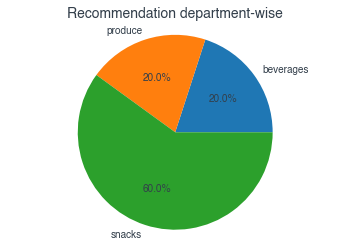

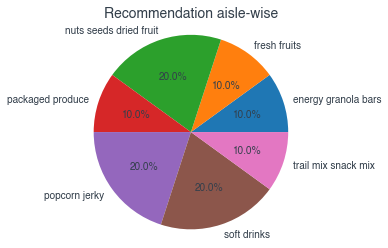

In [27]:
result_path = '../results/'

df_aisle_plot = df_report_recommend.groupby(['aisle']).size().reset_index(name='counts')
df_dept_plot = df_report_recommend.groupby(['department']).size().reset_index(name='counts')

plt.pie(df_dept_plot['counts'], labels=df_dept_plot['department'], autopct='%1.1f%%')
plt.title('Recommendation department-wise', fontsize=14)
plt.axis('equal')
plt.savefig(result_path + 'recommend_dept.png')
plt.show()

plt.pie(df_aisle_plot['counts'], labels=df_aisle_plot['aisle'], autopct='%1.1f%%')
plt.title('Recommendation aisle-wise', fontsize=14)
plt.axis('equal')
plt.savefig(result_path + 'recommend_aisle.png')
plt.show()

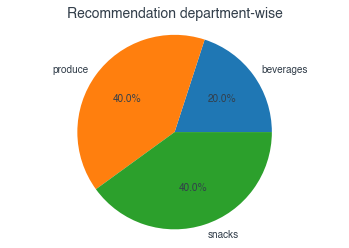

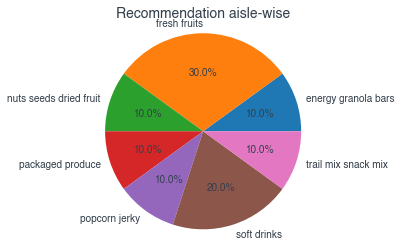

In [28]:
df_aisle_plot = df_report_recommend_tfidf.groupby(['aisle']).size().reset_index(name='counts')
df_dept_plot = df_report_recommend_tfidf.groupby(['department']).size().reset_index(name='counts')

plt.pie(df_dept_plot['counts'], labels=df_dept_plot['department'], autopct='%1.1f%%')
plt.title('Recommendation department-wise', fontsize=14)
plt.axis('equal')
plt.savefig(result_path + 'recommend_dept_tfidf.png')
plt.show()

plt.pie(df_aisle_plot['counts'], labels=df_aisle_plot['aisle'], autopct='%1.1f%%')
plt.title('Recommendation aisle-wise', fontsize=14)
plt.axis('equal')
plt.savefig(result_path + 'recommend_aisle_tfidf.png')
plt.show()

<ipython-input-29-2538708b5fcd>:46: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines['left'].set_smart_bounds(True)
<ipython-input-29-2538708b5fcd>:47: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  ax.spines['bottom'].set_smart_bounds(True)


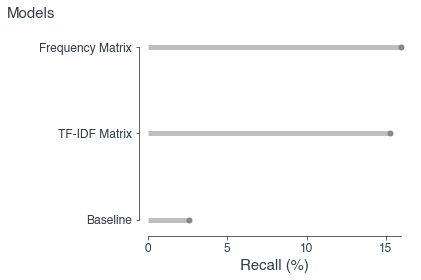

In [29]:
# Get these results after running recommender_test.py

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# create some fake data
recall = pd.Series([2.62, 15.97, 15.28], 
                        index=['Baseline','Frequency Matrix','TF-IDF Matrix'])
df = pd.DataFrame({'recall' : recall})
df = df.sort_values(by='recall')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['recall'], color='#808080', alpha=0.5, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['recall'], my_range, "o", markersize=5, color='#808080', alpha=0.9)

# set labels
ax.set_xlabel('Recall (%)', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Models', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig(result_path + 'recommend_results.png', dpi=300, bbox_inches='tight')